In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("heart failure clinical records.csv")

In [3]:
df.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


In [4]:
df_groupby = df.groupby(["age", "DEATH_EVENT"], as_index= False).ejection_fraction.count()
df_groupby.columns = ["Age", "Death_Event", "Count"]
df_groupby.head()

,Age,Death_Event,Count
0,40.0,0,7
1,41.0,0,1
2,42.0,0,6
3,42.0,1,1
4,43.0,0,1


**Trend Chart**

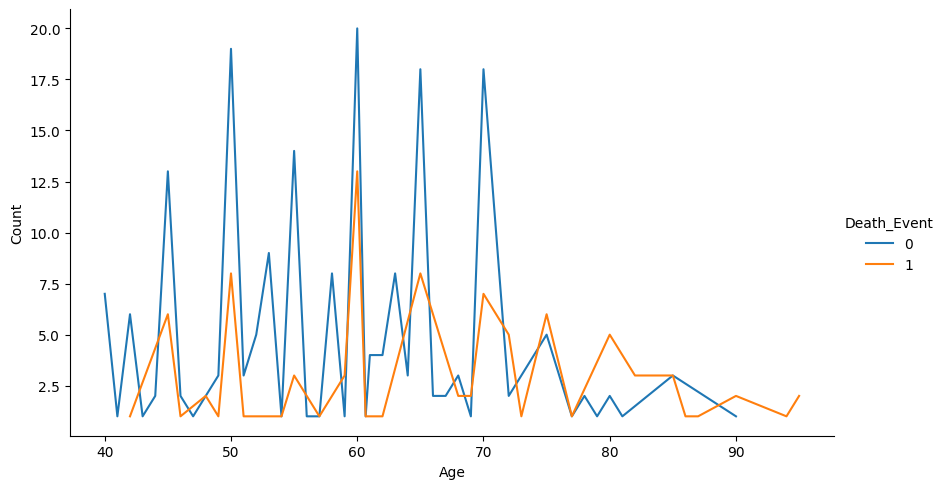

In [5]:
sns.relplot(data= df_groupby, x= "Age", y= "Count", hue="Death_Event" , kind= "line", aspect= 12/7)

**Scatter Plot**

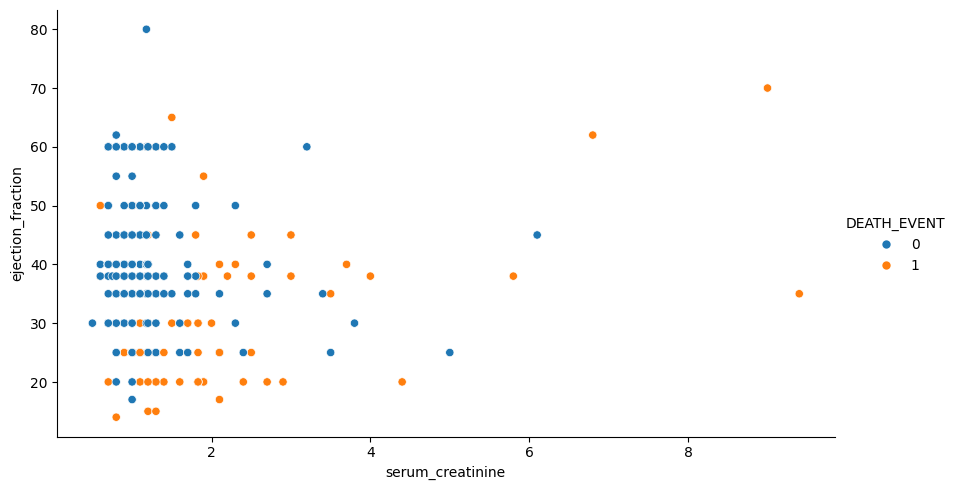

In [6]:
sns.relplot(data= df, x= "serum_creatinine", y= "ejection_fraction", hue= "DEATH_EVENT", kind= "scatter", aspect= 12/7)

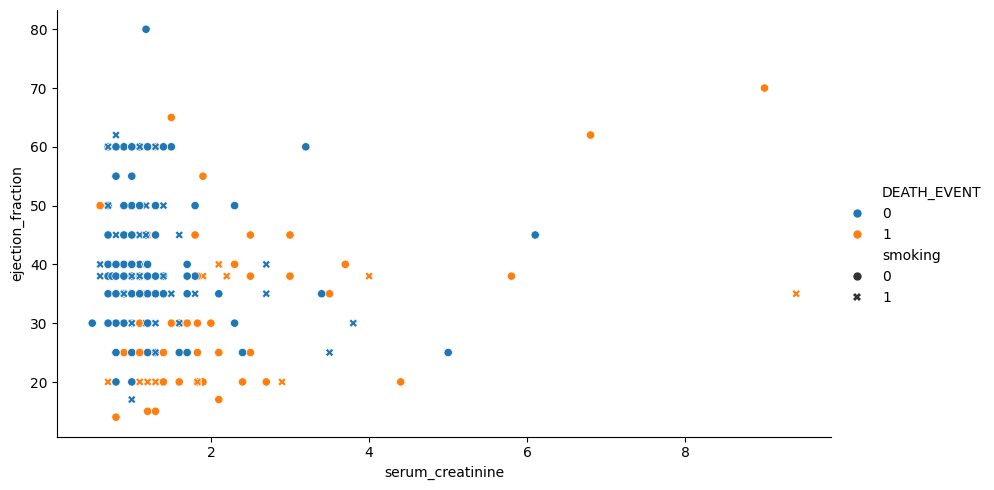

In [7]:
sns.relplot(data= df, x= "serum_creatinine", y= "ejection_fraction", hue= "DEATH_EVENT", kind= "scatter", style= "smoking", aspect= 12/7)

**Heatmap**

In [8]:
df_groupby_1 = df.groupby(["age", "ejection_fraction"], as_index= False).DEATH_EVENT.sum()
df_groupby_1.columns = ["Age", "ejection_fraction", "Deaths"]
df_groupby_1_p = df_groupby_1.pivot(index= "Age", columns= "ejection_fraction", values= "Deaths")
df_groupby_1_p.fillna(0, inplace=True)

<Axes: xlabel='ejection_fraction', ylabel='Age'>

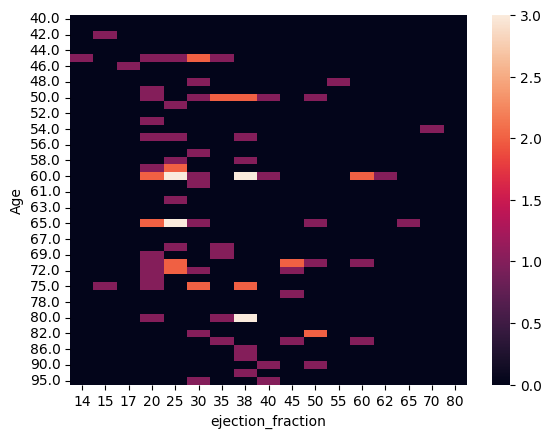

In [9]:
sns.heatmap(df_groupby_1_p)

<Axes: xlabel='ejection_fraction', ylabel='Age'>

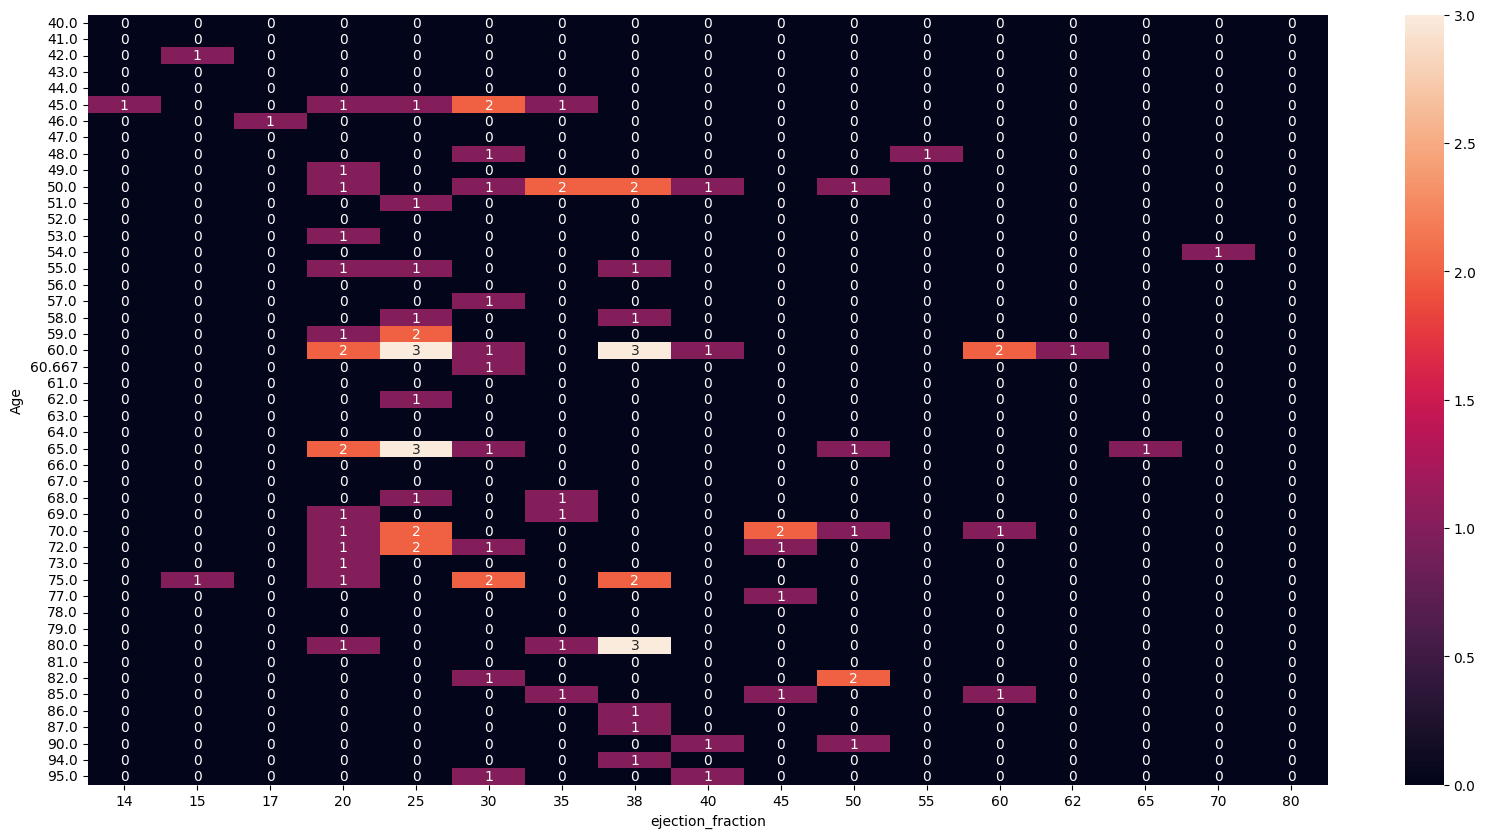

In [10]:
plt.subplots(figsize=(20, 10))
sns.heatmap(df_groupby_1_p, annot= True)

**Pair Plot**

In [11]:
subset = df.iloc[:, [0, 1, 2, 3, 4]]

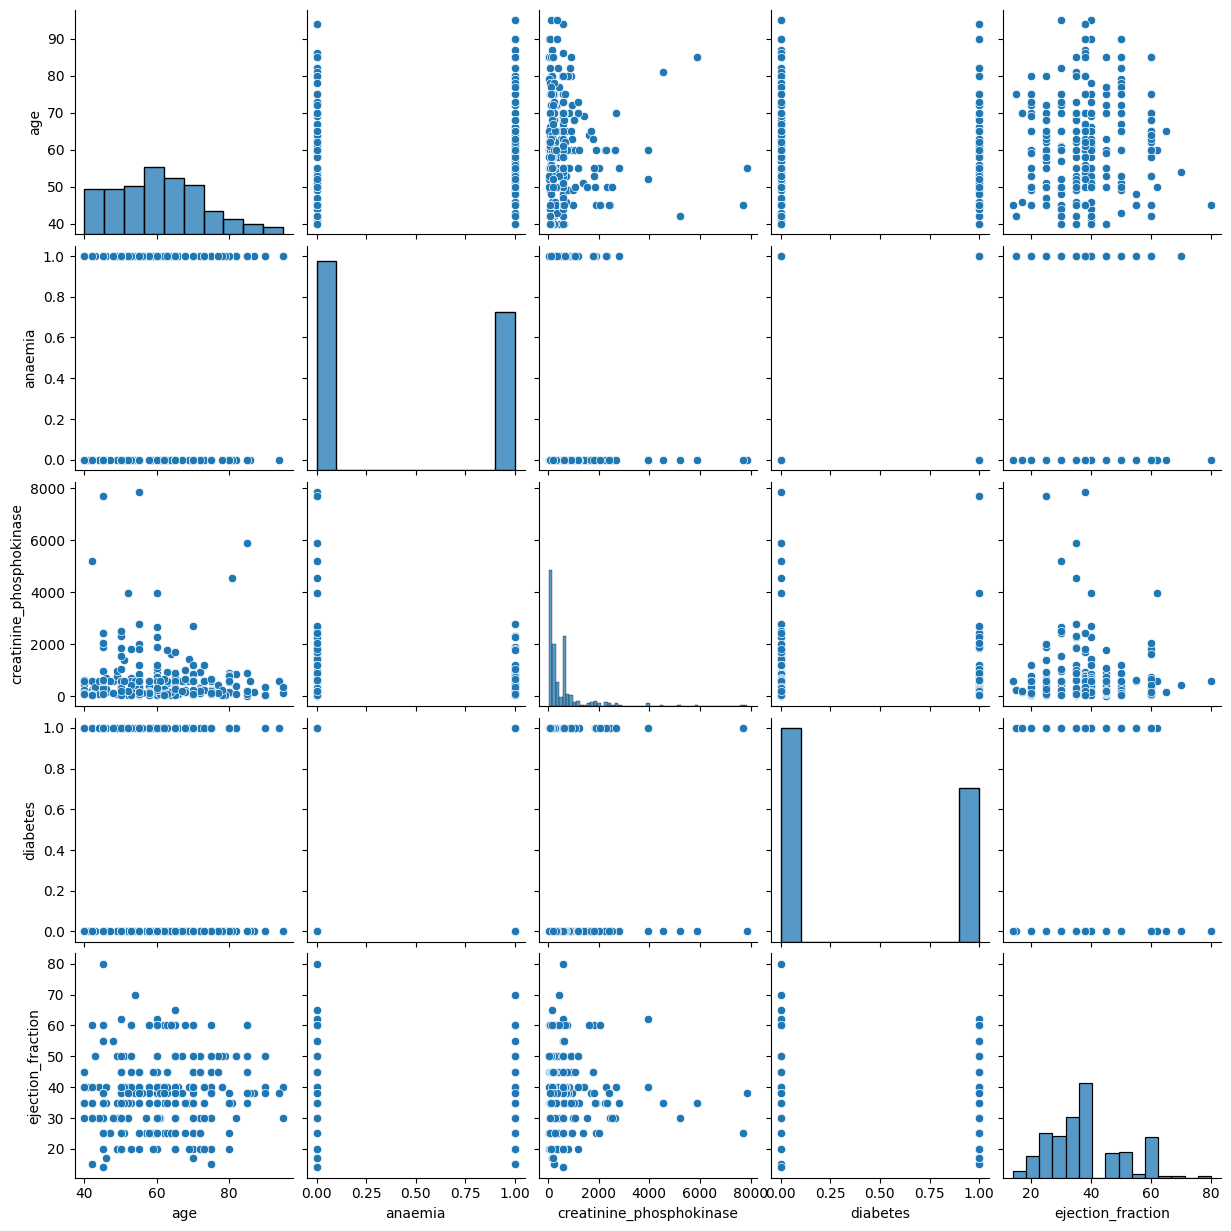

In [12]:
sns.pairplot(subset)